In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\niran's\UNH\projects\team 4 DS\data1.csv")
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
df.shape

(4238, 16)

In [5]:
df.isnull().sum().sort_values(ascending = False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [6]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [7]:
df['education'].corr(df['TenYearCHD']).round(2)

-0.05

In [8]:
df['glucose'].corr(df['TenYearCHD']).round(2)

0.13

In [9]:
df['BPMeds'].corr(df['TenYearCHD']).round(2)

0.09

In [10]:
df['totChol'].corr(df['TenYearCHD']).round(2)

0.08

In [11]:
#cigsPerDay
df['cigsPerDay'].corr(df['TenYearCHD']).round(2)
#BMI 


0.06

In [12]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

## Univariate Analysis

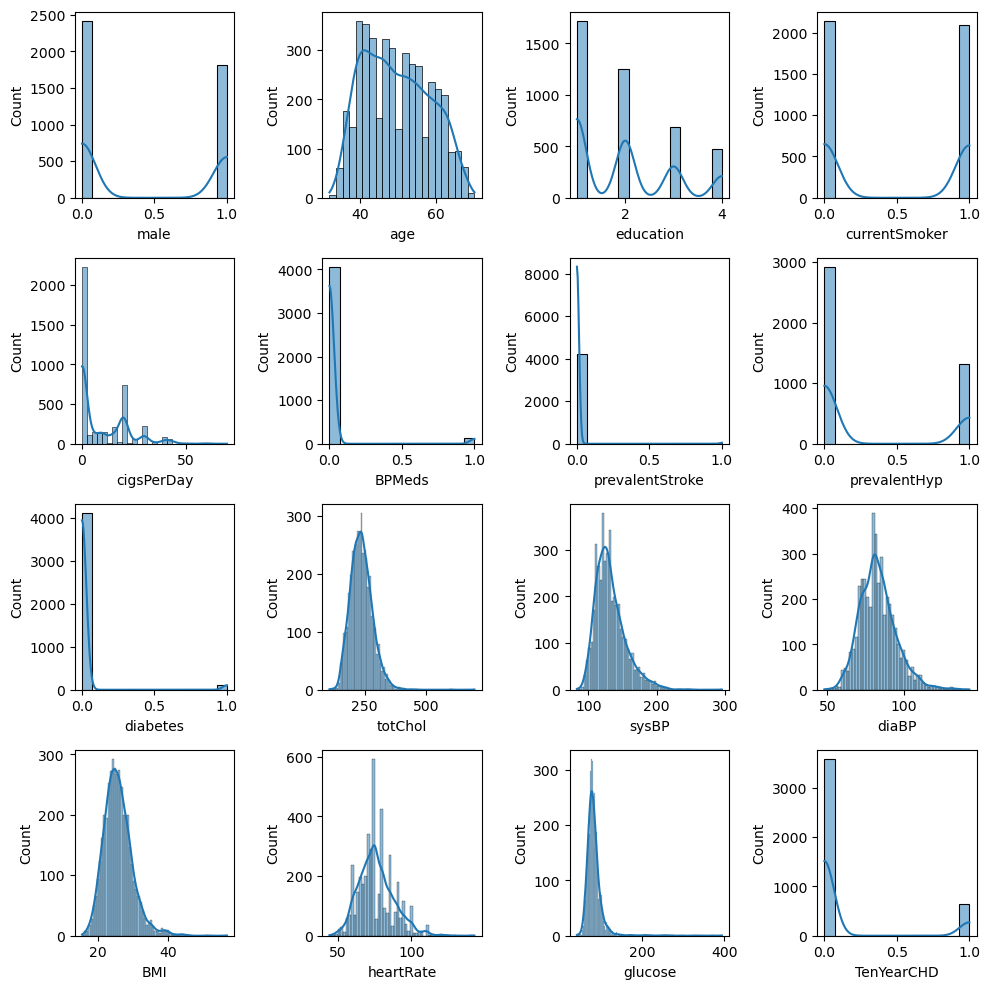

In [13]:
plt.figure(figsize=(10,10))

plotnumber=1
for column in df:
    plt.subplot(4,4,plotnumber)
    sns.histplot(x=df[column],kde=True)
    plotnumber+=1
plt.tight_layout()


In [14]:
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['education'].isnull().sum()

0

In [15]:
#glucose            388
#education          105
#BPMeds              53
#totChol             50
#cigsPerDay          29
#BMI                 19
#heartRate             1

## Handling Missing Data

In [16]:
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['cigsPerDay'].isnull().sum()

0

In [17]:
df['education'].fillna(df['education'].mode()[0],inplace=True)
df['education'].isnull().sum()

0

In [18]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['BMI'].isnull().sum()

0

In [19]:
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['totChol'].isnull().sum()

0

In [20]:
df['glucose'].fillna(df['glucose'].median(),inplace=True)
df['glucose'].isnull().sum()

0

In [21]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0],inplace=True)
df['BPMeds'].isnull().sum()

0

In [22]:
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)
df['heartRate'].isnull().sum()

0

## Implementing train test split

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3390, 15)
y_train shape: (3390,)
X_test shape: (848, 15)
y_test shape: (848,)


In [24]:
X_train

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3252,1,40,4.0,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0
3946,0,57,2.0,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0
1261,0,47,1.0,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0
2536,1,41,2.0,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0
4089,0,64,1.0,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,0.0,0,1,0,222.0,147.0,94.0,26.79,76.0,71.0
466,0,57,3.0,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.0
3092,0,60,2.0,0,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.0
3772,1,39,2.0,1,10.0,0.0,0,0,0,215.0,102.0,64.5,24.50,68.0,62.0


In [25]:
y_train

3252    0
3946    0
1261    0
2536    0
4089    0
       ..
3444    0
466     0
3092    0
3772    0
860     0
Name: TenYearCHD, Length: 3390, dtype: int64

In [26]:
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0
764,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0
3264,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0
1967,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0
2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,1,47,1.0,0,0.0,0.0,0,0,0,259.0,139.0,79.0,29.34,70.0,71.0
4056,1,44,2.0,0,0.0,0.0,0,0,0,254.0,130.0,80.0,28.15,80.0,74.0
4210,1,50,1.0,0,0.0,0.0,0,0,0,282.0,126.5,88.0,27.30,85.0,87.0
3971,1,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0


In [27]:
y_test

3188    0
764     0
3264    0
1967    0
2185    0
       ..
3303    1
4056    0
4210    0
3971    0
2540    0
Name: TenYearCHD, Length: 848, dtype: int64

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

C:\Users\niran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8561320754716981

## DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 77.24056603773585


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)
predictions = rf_classifier.predict(X_test)


# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:",accuracy*100)

Accuracy: 84.66981132075472
